In [21]:
from keras.datasets import mnist
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Conv2D, Flatten, AveragePooling2D,Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()
print(train_x.shape)
print(test_x.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
train_x = train_x/255.0
test_x = test_x/255.0

print(train_x.shape)
print(test_x.shape)

train_x = tf.expand_dims(train_x,3)
test_x = tf.expand_dims(test_x,3)

print(train_x.shape)
print(test_x.shape)

val_x = train_x[:5000]
val_y = train_y[:5000]

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# model building 

model = Sequential()
model.add(Conv2D(6,kernel_size = 5, strides=1,activation='tanh',input_shape = train_x[0].shape, padding='valid'))
model.add(AveragePooling2D())
model.add(Conv2D(16, kernel_size=5, strides=1,activation='tanh',padding='same'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(120,activation ='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))


model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [8]:
history = model.fit(train_x,train_y,epochs =20,validation_data =(val_x,val_y))
test_loss, test_accuracy = model.evaluate(test_x,test_y)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 8.7124e-04 - val_accuracy: 0.9996
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0010 - val_accuracy: 0.9996
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9994
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 4.4470e-04 - val_accuracy: 0.9996
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 4.0059e-04 - val_accuracy: 0.9998
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0012 - v

In [22]:
print(f'Testing accuracy {np.round(test_accuracy,2)}')

Testing accuracy 0.99


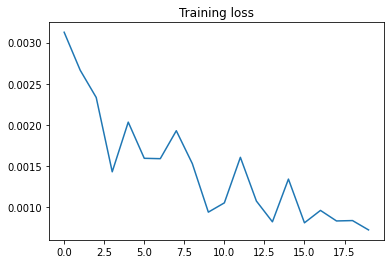

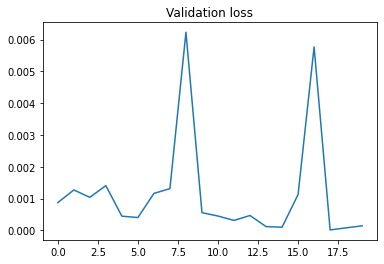

In [23]:

plt.title('Training loss')
plt.plot(history.history['loss'])
plt.show()
plt.title('Validation loss')
plt.plot(history.history['val_loss'])
plt.show()